In [1]:
import sklearn
import numpy as np
import os
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
predictors=iris['feature_names']
X = df[predictors]
y = df['target']
print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (150, 4)
y shape :  (150,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
knn_clf.predict(X_train)

/home/aix23908/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

In [9]:
from sklearn.model_selection import cross_val_score


k_range = range(1,50)              
k_scores = []                        

for k in k_range :
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn,X_train,y_train,cv=3,scoring = "accuracy")  
#     print("k : ",k," / score : ", scores)
    k_scores.append(scores.mean())                    

/home/aix23908/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/aix23908/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

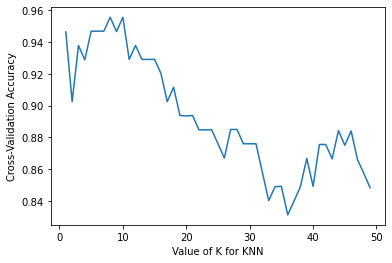

In [10]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

## 오차행렬 ( Confusion Matrix )

클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것

- 실제 타깃과 비교할 수 있도록 먼저 예측값을 만들어야한다. cross_val_predict()함수 사용
- cross_val_predict : k-fold cross validation을 수행하지만 평가 점수를 반환하지 않고 예측을 반환한다.

<img src = "./Precision_recall_Representation_1052507280.png" width = "50%" height = "50%">
사진 출처 : https://www.datacamp.com/tutorial/precision-recall-curve-tutorial

In [11]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

/home/aix23908/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/aix23908/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred)
cm

array([[37,  0,  0],
       [ 0, 32,  2],
       [ 0,  4, 37]])

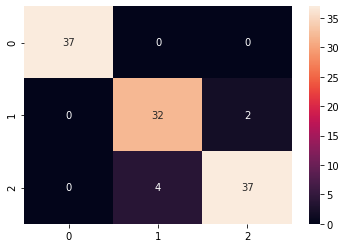

In [13]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

## 정밀도와 재현율
정밀도(precision) : positive라고 예측한 것 중에서 실제 positive
$$TP\over TP+FP$$

재현율(recall) : 실제 positive( True positive )중에서 positive라고 예측한 것의 비율
$$TP\over TP+FN$$

$F_1$score : precision과 recall의 조화평균

$$ = {2\over {{1\over precision} + {1\over recall}}}$$

$$ = {2*{precision * recall}\over{precision + recall}}$$

$$ = {TP\over TP + {{TN+FP}\over2}}$$

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

cm = confusion_matrix(y_train, y_train_pred)
print("precision")
print("함수사용 : ", precision_score(y_train, y_train_pred, average = None))
print("계산 : ",cm[1, 1] / (cm[0, 1] + cm[1, 1]))
print("-"*8)
print("recall")
print("함수사용 : ", recall_score(y_train, y_train_pred, average = None))
print("계산 : ",cm[1, 1] / (cm[1, 0] + cm[1, 1]))
print("-"*8)
print("f1_score")
print("함수사용 : ", f1_score(y_train, y_train_pred, average = None))
print("계산 : ",cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2))

precision
함수사용 :  [1.         0.88888889 0.94871795]
계산 :  1.0
--------
recall
함수사용 :  [1.         0.94117647 0.90243902]
계산 :  1.0
--------
f1_score
함수사용 :  [1.         0.91428571 0.925     ]
계산 :  1.0


## 정밀도/재현율 트레이드 오프

sklearn에서 불확실성을 추정할 수 있는 함수는 decision_function과 perdict_proba 두가지가 있다. 

### sklearn.decision_function() method 
decision function을 이용하여 각 샘플의 점수를 계산한다. 점수가 threshold보다 크면 positive, 그렇지 않으면 negative에 해당한다. 

decision function의 반환값 크기는 (n_samples, )이며 각 샘플이 하나의 실수 값을 반환한다.

In [15]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

(70000, 784)
(70000,)


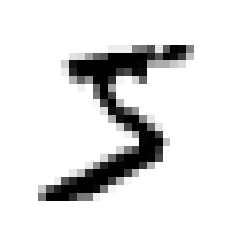

In [16]:
X_mnist, y_mnist = mnist["data"], mnist["target"]
print(X_mnist.shape)
print(y_mnist.shape)
y_mnist = y_mnist.astype(np.uint8)

some_digit = X_mnist[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

In [17]:
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X_mnist, y_mnist, random_state=0)

In [18]:
y_mnist_train_5 = (y_mnist_train == 5) # 5는 True, 다른 숫자는 모두 False
y_mnist_test_5 = (y_mnist_test == 5)

In [19]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42, n_jobs=-1)
sgd_clf.fit(X_mnist_train, y_mnist_train_5)

SGDClassifier(n_jobs=-1, random_state=42)

In [20]:
print("X_test.shape: {}".format(X_mnist_test.shape))
print("결정 함수 결과 형태: {}".format(sgd_clf.decision_function(X_mnist_test).shape))

X_test.shape: (17500, 784)
결정 함수 결과 형태: (17500,)


In [21]:
print("결정 함수:\n{}".format(sgd_clf.decision_function(X_mnist_test)[:10]))


결정 함수:
[ -9802.98569043  -5906.57700833  -6746.65216407 -10389.64495401
 -12113.29515831 -16750.67748381 -19158.53009504  -9229.68403535
  -4954.77318223  -6870.97438279]


In [22]:
print("임계치와 결정 함수 결과 비교:\n{}".format(sgd_clf.decision_function(X_mnist_test)[:10] > 0))
print("예측:\n{}".format(sgd_clf.predict(X_mnist_test[:10])))

임계치와 결정 함수 결과 비교:
[False False False False False False False False False False]
예측:
[False False False False False False False False False False]


In [23]:
y_scores = sgd_clf.decision_function(X_mnist_test)
y_scores

array([ -9802.98569043,  -5906.57700833,  -6746.65216407, ...,
         5111.38747945, -14564.6140527 , -23346.90833707])

In [24]:
threshold = 0
y_pred_0 = (y_scores > threshold)
y_pred_0[:5]

array([False, False, False, False, False])

In [25]:
threshold = 8000
y_pred_6 = (y_scores > threshold)
y_pred_6[:5]
#threshold를 올리면 recall(실제 참을 참이라고 예측할 확률)이 떨어진다.

array([False, False, False, False, False])

### 적절한 임계값을 정하는 방식

1. cross_val_predict()함수를 사용해 훈련 세트에 있는 모든 샘플의 점수를 구한다.

2. 하지만 예측 결과가 아니라 결정 점수를 반환받도록 지정해야 한다.

3. 이 점수로 precision_recall_curve() 함수를 사용하여 가능한 모든 임계값에 대해 정밀도와 재현율을 계산한다.

4. 시각화하여 확인한다.

## Precision-Recall Curve 함수

- Precision-Recall Curves는 Parameter인 Threshold를 변화시키면서 Precision과 Recall을 Plot 한 Curve이다.

- Precision-Recall Curves는 X축으로는 Recall을, Y축으로는 Precision을 가지며, Precision-Recall Curve는 단조함수가 아니다. 

- 이러한 이유로 ROC Curve보다 직관적이지 못하다는 단점을 가진다.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

In [26]:
y_scores = cross_val_predict(sgd_clf, X_mnist_train, y_mnist_train_5, cv=3, method="decision_function")

In [27]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_mnist_train_5, y_scores)

In [28]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

<function matplotlib.pyplot.show(*args, **kw)>

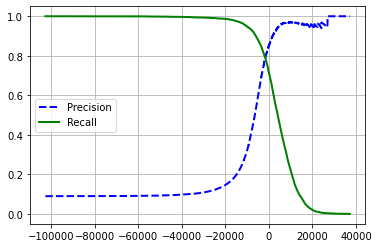

In [29]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)       
    plt.grid(True)                              
    plt.legend()             

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show

### recall에 대한 precision 곡선을 그리는 것

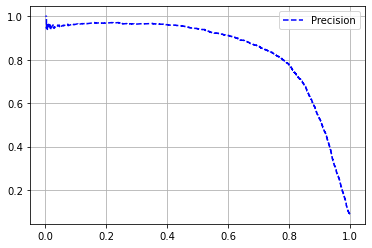

In [30]:
def plot_precision_vs_recall(precisions, recall):
    plt.plot(recalls[:-1], precisions[:-1], "b--", label = "Precision")
    plt.legend()
    plt.grid()
    
plot_precision_vs_recall(precisions, recalls)
plt.show()

### sklearn.predict_proba() method

기본적으로 sklearn의 이진분류에서는 0.5(50%)를 임계값으로 설정하고 이에따라 레이블을 예측한다. 즉, 예측 확률이 1로 예측되는 확률이 50%보다 크면 Positive(1)로, 작으면 Negative(0)으로 예측하게 되는 것이다.

sklearn의 predict_proba() method를 사용하면 예측 확률을 직접 확인하는 것도 가능하다. predict_proba() 반환 값의 첫 번째 컬럼은 Negative(0)의 확률, 두 번째 컬럼은 Positive(1)의 확률을 나타낸다.

다중분류 - mnist Dataset, SGDClassifier 사용

In [31]:
from sklearn.neighbors import KNeighborsClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, loss="modified_huber",random_state=42, n_jobs=-1)
sgd_clf.fit(X_mnist_train, y_mnist_train_5)

# knn = SGDClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)

SGDClassifier(loss='modified_huber', n_jobs=-1, random_state=42)

In [32]:
print("확률 값의 형태: {}".format(sgd_clf.predict_proba(X_mnist_test).shape))
print("Predicted probabilities:\n{}".format(sgd_clf.predict_proba(X_mnist_test)[:6,:]))

확률 값의 형태: (17500, 2)
Predicted probabilities:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [33]:
pred_proba = sgd_clf.predict_proba(X_mnist_test)
pred = sgd_clf.predict(X_mnist_test)

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print(pred_proba_result[:3])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


## ROC 곡선
precision / recall 곡선과 매우 비슷하지만 false positive rate(FPR)에 대한 true positive rate(TPR)의 곡선이다.

FPR : positive로 잘못 분류된 negative sample의 비율 = 1에서 true negative rate(TNR, 특이도)를 뺀 값

ROC곡선 : TPR(recall)에 대한 1-TNR의 값


<img src = "./1_xhFLNjF82feNl8X6uinXMA.webp" width = "50%" height = "50%">
사진 출처 : https://albertum.medium.com/short-introduction-to-roc-curve-ed137062672f


In [34]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_mnist_train_5, y_scores)

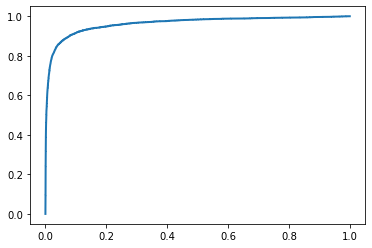

In [35]:
plt.plot(fpr, tpr, linewidth=2, label=None)
plt.show()